# Description

This notebook provides the training of different model architectures after electrode selection.

## setting up the environment

In [27]:
FILE_PARAM = '../data/Subject_1.mat'

In [28]:
import sys
sys.path.append('../src')  
from data_loading import load_and_combine_mat_data
from preprocessing import preprocess_data
from evaluation import evaluate_model

import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.ndimage import median_filter
from sklearn.preprocessing import RobustScaler

from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

from scipy.signal import butter, filtfilt
from scipy.ndimage import median_filter
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
mat_file_paths = [FILE_PARAM]
X, y, Channels = load_and_combine_mat_data(mat_file_paths)

Combined EEG Data Shape (Samples, Channels, Trials): (512, 128, 200)
Combined Labels Shape: (200,)
Channels: ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B30', 'B31', 'B32', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31', 'C32', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24', 'D25', 'D26', 'D27', 'D28', 'D29', 'D30', 'D31', 'D32']


In [30]:
X_preprocessed =  preprocess_data(X)
print(X_preprocessed.shape)

(512, 128, 200)


# RFE

In [31]:
clf = DecisionTreeClassifier(random_state=0)

In [32]:
X_reshaped = X_preprocessed.transpose(2, 0, 1).reshape(-1, X_preprocessed.shape[1])  

In [ ]:
rfe = RFE(estimator=clf, n_features_to_select=8)

# Fit RFE on the reshaped data, HINT: it will take time
rfe.fit(X_reshaped, y)

# Modeling

## MLP

In [ ]:
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64),       # Fewer neurons and layers
    activation='relu',                  # ReLU activation function
    solver='adam',                      # Adam optimizer
    alpha=0.01,                         # Increased L2 regularization (weight decay)
    learning_rate_init=0.001,           # Learning rate
    max_iter=300,                       # Set maximum iterations
    random_state=42,
    early_stopping=True,                # Early stopping to prevent overfitting
    validation_fraction=0.2,            # Use 20% of the training data for validation
    n_iter_no_change=10                 # Stop if no improvement for 10 iterations
)

In [ ]:
selected_channel_indices = np.where(rfe.support_)[0]

In [ ]:
X = np.transpose(X_preprocessed[:, selected_channel_indices, :], (2, 0, 1))  
X = X.reshape(200, -1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
mlp.fit(X_train, y_train)


MLPClassifier(alpha=0.01, early_stopping=True, hidden_layer_sizes=(128, 64),
              max_iter=300, random_state=42, validation_fraction=0.2)

In [ ]:
evaluate_model(mlp, X_test, y_test, X_train, y_train)

Test Accuracy: 0.95
Classification Report Test:
               precision    recall  f1-score   support

         0.0       0.86      1.00      0.92         6
         1.0       1.00      0.87      0.93        15
         2.0       0.90      1.00      0.95         9
         3.0       1.00      1.00      1.00        10

    accuracy                           0.95        40
   macro avg       0.94      0.97      0.95        40
weighted avg       0.96      0.95      0.95        40

Train Accuracy: 0.9875
Classification Report Train:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        44
         1.0       0.95      1.00      0.97        35
         2.0       1.00      0.98      0.99        41
         3.0       1.00      1.00      1.00        40

    accuracy                           0.99       160
   macro avg       0.99      0.99      0.99       160
weighted avg       0.99      0.99      0.99       160



{'test_accuracy': 0.95,
 'test_report': '              precision    recall  f1-score   support\n\n         0.0       0.86      1.00      0.92         6\n         1.0       1.00      0.87      0.93        15\n         2.0       0.90      1.00      0.95         9\n         3.0       1.00      1.00      1.00        10\n\n    accuracy                           0.95        40\n   macro avg       0.94      0.97      0.95        40\nweighted avg       0.96      0.95      0.95        40\n',
 'train_accuracy': 0.9875,
 'train_report': '              precision    recall  f1-score   support\n\n         0.0       1.00      0.98      0.99        44\n         1.0       0.95      1.00      0.97        35\n         2.0       1.00      0.98      0.99        41\n         3.0       1.00      1.00      1.00        40\n\n    accuracy                           0.99       160\n   macro avg       0.99      0.99      0.99       160\nweighted avg       0.99      0.99      0.99       160\n'}

## BiLSTM

## CNN

In [34]:
X_cnn = X_preprocessed[:, selected_channel_indices, :].transpose(2, 0, 1).reshape(200, 512, 8, 1)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_cnn, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.preprocessing import RobustScaler

# Reshape training data for scaling (samples * time steps, channels)
X_train_reshaped = X_train.reshape(-1, X_train.shape[2])
X_val_reshaped = X_test.reshape(-1, X_test.shape[2])

# Initialize and fit RobustScaler on training data
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_reshaped)

# Apply the same scaler to validation data (use only the statistics from the training set)
X_val_scaled = scaler.transform(X_val_reshaped)

# Reshape back to original dimensions (samples, time steps, channels, 1)
X_train_scaled = X_train_scaled.reshape(X_train.shape)
X_val_scaled = X_val_scaled.reshape(X_test.shape)

# Print the shapes to confirm
print("Scaled X_train shape:", X_train_scaled.shape)
print("Scaled X_val shape:", X_val_scaled.shape)


Scaled X_train shape: (160, 512, 8, 1)
Scaled X_val shape: (40, 512, 8, 1)


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, DepthwiseConv2D, SeparableConv2D, AveragePooling2D, Dropout, Flatten, Dense, BatchNormalization, Activation
from tensorflow.keras.optimizers import Nadam

# Define the EEGNet model
def create_eegnet_model(input_shape=(512, 8, 1), num_classes=4):
    model = Sequential()

    # First Conv2D block
    model.add(Conv2D(4, (64, 1), padding='same', input_shape=input_shape, use_bias=False))  # Reduced filters
    model.add(BatchNormalization())

    # Depthwise Conv2D block
    model.add(DepthwiseConv2D((1, 1), use_bias=False, depth_multiplier=2, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(AveragePooling2D((1, 4)))  # Pooling along the width
    model.add(Dropout(0.2))

    # Separable Conv2D block
    model.add(SeparableConv2D(8, (1, 16), use_bias=False, padding='same'))  # Reduced filters
    model.add(BatchNormalization())
    model.add(Activation('elu'))

    # Adjust the pooling size here to avoid negative dimensions
    model.add(AveragePooling2D((1, 2)))  # Reduced from (1, 4) to (1, 2)
    model.add(Dropout(0.2))

    # Flatten and classification
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Build and compile the model
model = create_eegnet_model()

# Define Nadam optimizer
optimizer = Nadam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


/home/jovyan/myenv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 512, 8, 4)      │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512, 8, 4)      │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_1              │ (None, 512, 8, 8)      │             8 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512, 8, 8)      │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 512, 8, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 512, 2, 8)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512, 2, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_1              │ (None, 512, 2, 8)      │           192 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512, 2, 8)      │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 512, 2, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_3             │ (None, 512, 1, 8)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512, 1, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │        16,388 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,924 (66.11 KB)

 Trainable params: 16,884 (65.95 KB)

 Non-trainable params: 40 (160.00 B)

In [41]:
from tensorflow.keras.callbacks import LearningRateScheduler
import numpy as np

# Cyclical learning rate function
def cyclical_lr(step_size, min_lr=1e-5, max_lr=5e-3):
    def clr(epoch):
        cycle = np.floor(1 + epoch / (2 * step_size))
        x = np.abs(epoch / step_size - 2 * cycle + 1)
        lr = min_lr + (max_lr - min_lr) * np.maximum(0, (1 - x))
        return lr
    return clr

# Set cyclical learning rate scheduler
clr_callback = LearningRateScheduler(cyclical_lr(step_size=200))

# Train the model
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_val_scaled, y_test),
                    epochs=50,  # Reduced epochs
                    batch_size=64,  # Reduced batch size
                    callbacks=[clr_callback])

Epoch 1/50


I0000 00:00:1730158105.421725   10619 service.cc:146] XLA service 0x717270005a40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730158105.421782   10619 service.cc:154]   StreamExecutor device (0): NVIDIA A16, Compute Capability 8.6
I0000 00:00:1730158105.421789   10619 service.cc:154]   StreamExecutor device (1): NVIDIA A16, Compute Capability 8.6
2024-10-28 23:28:25.715337: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-28 23:28:26.167957: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2852 - loss: 1.4922 

I0000 00:00:1730158114.477470   10619 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.2863 - loss: 1.5107 - val_accuracy: 0.2000 - val_loss: 1.3828 - learning_rate: 1.0000e-05
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.2996 - loss: 1.5354 - val_accuracy: 0.2000 - val_loss: 1.3820 - learning_rate: 3.4950e-05
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.2945 - loss: 1.4570 - val_accuracy: 0.2500 - val_loss: 1.3808 - learning_rate: 5.9900e-05
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.3605 - loss: 1.4036 - val_accuracy: 0.3000 - val_loss: 1.3791 - learning_rate: 8.4850e-05
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.3059 - loss: 1.4622 - val_accuracy: 0.3250 - val_loss: 1.3768 - learning_rate: 1.0980e-04
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.3770 - loss: 1.3173 - val_accuracy: 0.4000 - val_loss: 1.3741 - learning_rate: 1.3475e-04
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.4414 - loss: 1.2493 - val_accur

In [43]:
model.evaluate(X_val_scaled, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.6687 - loss: 0.9086


[0.908425509929657, 0.675000011920929]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 345ms/step
Confusion Matrix:
 [[ 3  1  1  1]
 [ 0 10  3  2]
 [ 0  1  6  2]
 [ 0  0  2  8]]


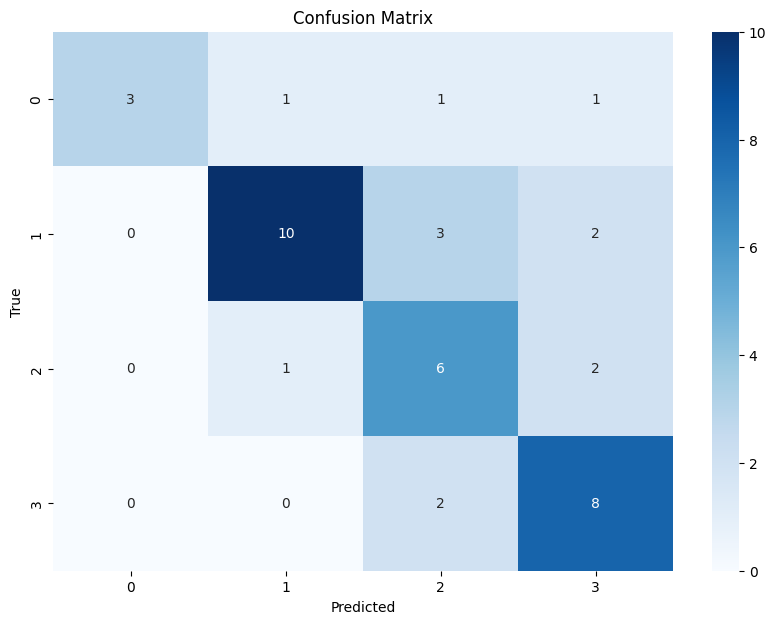

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         6
         1.0       0.83      0.67      0.74        15
         2.0       0.50      0.67      0.57         9
         3.0       0.62      0.80      0.70        10

    accuracy                           0.68        40
   macro avg       0.74      0.66      0.67        40
weighted avg       0.73      0.68      0.68        40



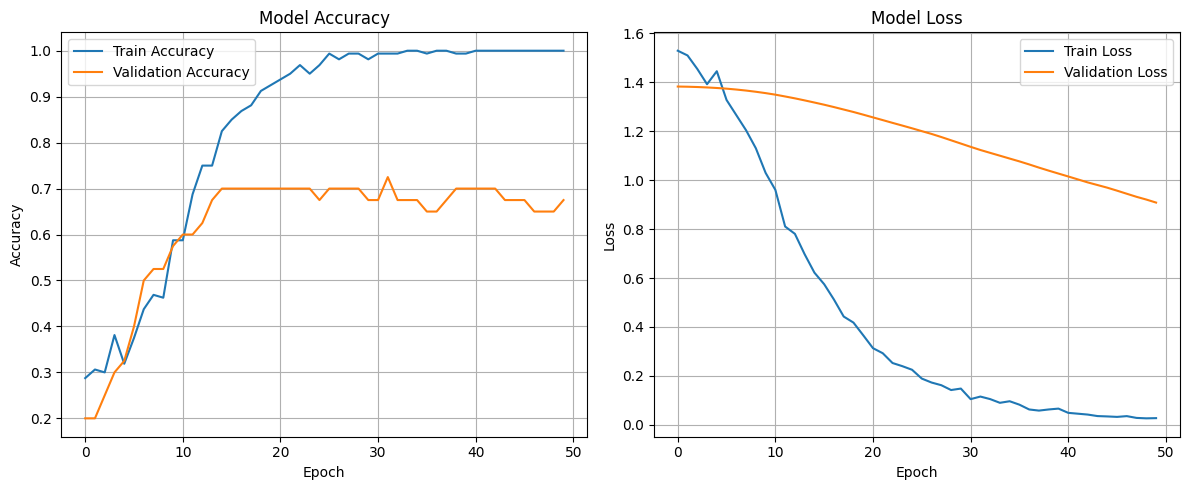

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the validation set
y_pred = model.predict(X_val_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred_classes))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
